# <span style="color:red">IPL Match Dataset Analysis and Visualization</span>

<span style="color:black">This project focuses on analyzing IPL (Indian Premier League) cricket match data. The objective is to perform exploratory data analysis, uncover patterns, and visualize key insights such as scoring trends, team performance, and player statistics.</span>

## <span style="color:blue">Dataset Overview</span>

The IPL dataset used in this project contains detailed information about matches played in the Indian Premier League. It includes various attributes such as:

- <span style="color:orange">**Match details**</span>: Date, season, venue, and city.  
- <span style="color:orange">**Teams and outcome**</span>: Names of competing teams, toss winner, toss decision, match winner, result margin, and player of the match.  
- <span style="color:orange">**Scoring information**</span>: Target runs, target overs, and other numerical details related to match performance.  

The dataset provides a comprehensive view of historical IPL matches, allowing for analysis of team performance, venue trends, toss impact, and other key insights.  
This dataset was sourced from **Kaggle**, a popular platform for data science competitions and datasets.



###  <span style="color:blue">Importing Required Libraries

In this step, we import all the necessary libraries:
- <span style="color:orange">**pandas**</span> for data manipulation
- <span style="color:orange">**numpy**</span> for numerical operations
- <span style="color:orange">**sklearn.preprocessing.LabelEncode**</span> for encoding categorical variables
- <span style="color:orange">**matplotlib.pyplot**</span> and <span style="color:orange">**seaborn**</span> for data visualization


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color:blue"> Reading the file

In [2]:
ipl=pd.read_csv('ipl_matches.csv')
print('File successfully read')

File successfully read


## <span style="color:blue">Data Inspection & Understanding</span>

#### <span style="color:green"> Reading the top 5 values
To understand the data 

In [3]:
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


#### <span style="color:green"> Reading the bottom 5 values
To understand the data

In [4]:
ipl.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


#### <span style="color:green"> Getting basic information about the data

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

#### <span style="color:green">Generating summary statistics for numerical columns</span>

In [6]:
ipl.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


#### <span style="color:green">Checking column names in the dataset</span>

In [7]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

#### <span style="color:green">Checking the shape of the dataset</span>

In [8]:
ipl.shape

(1095, 20)

#### <span style="color:green">Checking the data types of each column</span>

In [9]:
ipl.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

#### <span style="color:green">Checking for missing values</span>

In [10]:
ipl.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

#### <span style="color:green">Checking for duplicate rows</span>

In [11]:
ipl.duplicated().sum()

0

#### <span style="color:green">Checking match win counts for each team</span>

In [12]:
ipl['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

#### <span style="color:green">Checking the number of unique venues</span>

In [13]:
ipl['venue'].nunique()

58

#### <span style="color:green">Counting match wins per team for each season</span>

In [14]:
ipl.groupby('season')['winner'].value_counts()

season   winner                     
2007/08  Rajasthan Royals               13
         Kings XI Punjab                10
         Chennai Super Kings             9
         Delhi Daredevils                7
         Mumbai Indians                  7
                                        ..
2024     Lucknow Super Giants            7
         Royal Challengers Bengaluru     7
         Gujarat Titans                  5
         Punjab Kings                    5
         Mumbai Indians                  4
Name: count, Length: 146, dtype: int64

#### <span style="color:green">Checking correlation between numerical columns</span>

In [15]:
ipl[['result_margin', 'target_runs', 'target_overs']].corr()

,result_margin,target_runs,target_overs
result_margin,1.00000,0.395120,0.030970
target_runs,0.39512,1.000000,0.352361
target_overs,0.03097,0.352361,1.000000


## <span style="color:blue">Data Preprocessing</span>


#### <span style="color:green">Dropping unnecessary column from the dataset</span>

In [16]:
ipl.drop(['method'], axis=1, inplace=True)  
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


#### <span style="color:green">Filling missing values in 'target_runs' with the median</span>

In [17]:
ipl['target_runs'] = ipl['target_runs'].fillna(ipl['target_runs'].median())

#### <span style="color:green">Filling missing values in 'target_overs' with the mode</span>

In [18]:
ipl['target_overs'] = ipl['target_overs'].fillna(ipl['target_overs'].mode()[0])

#### <span style="color:green">Filling missing values in 'result_margin' with 0</span>

In [19]:
ipl['result_margin'] = ipl['result_margin'].fillna(0)

#### <span style="color:green">Filling missing 'city' values using forward and backward fill based on 'venue'</span>

In [20]:
ipl['city'] = ipl.groupby('venue')['city'].transform(lambda x: x.ffill().bfill())

#### <span style="color:green">Filling missing 'player_of_match' values with 'Not awarded'</span>

In [21]:
ipl['player_of_match'] = ipl['player_of_match'].fillna('Not awarded')

#### <span style="color:green">Filling missing 'winner' values with 'No Result'</span>

In [22]:
ipl['winner'] = ipl['winner'].fillna('No Result')

#### <span style="color:green">Encoding categorical columns using Label Encoding</span>

In [23]:
label_encoders = {}
# List of specific columns to encode
columns_to_encode = ['season', 'match_type', 'toss_decision', 'result']

for col in columns_to_encode:
    le = LabelEncoder()
    ipl[col] = le.fit_transform(ipl[col].astype(str))
    label_encoders[col] = le

#### <span style="color:green">Converting 'date' column to datetime format</span>

In [24]:
ipl['date'] = pd.to_datetime(ipl['date'])

#### <span style="color:green">Viewing the first 25 rows after data preprocessing</span>

In [25]:
ipl.head(25)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,0,Bangalore,2008-04-18,4,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,1,Kolkata Knight Riders,1,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,0,Chandigarh,2008-04-19,4,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,0,Chennai Super Kings,1,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,0,Delhi,2008-04-19,4,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,0,Delhi Daredevils,3,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,0,Mumbai,2008-04-20,4,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,0,Royal Challengers Bangalore,3,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,0,Kolkata,2008-04-20,4,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,0,Kolkata Knight Riders,3,5.0,111.0,20.0,N,BF Bowden,K Hariharan
5,335987,0,Jaipur,2008-04-21,4,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,0,Rajasthan Royals,3,6.0,167.0,20.0,N,Aleem Dar,RB Tiffin
6,335988,0,Hyderabad,2008-04-22,4,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,0,Delhi Daredevils,3,9.0,143.0,20.0,N,IL Howell,AM Saheba
7,335989,0,Chennai,2008-04-23,4,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,1,Chennai Super Kings,1,6.0,209.0,20.0,N,DJ Harper,GA Pratapkumar
8,335990,0,Hyderabad,2008-04-24,4,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,1,Rajasthan Royals,3,3.0,215.0,20.0,N,Asad Rauf,MR Benson
9,335991,0,Chandigarh,2008-04-25,4,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,1,Kings XI Punjab,1,66.0,183.0,20.0,N,Aleem Dar,AM Saheba


## <span style="color:blue">Data Visualization & Insights</span>

### <span style="color:green">Correlation between Result Margin, Target Runs, and Target Overs </span>
We visualize the correlation between key numerical columns using <span style="color:orange"> **sns.heatmap()**. </span>
##### <span style="color:violet">Functions used </span>
- <span style="color:brown">**corr()**</span>: Calculates the correlation matrix for selected columns.  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**sns.heatmap()**</span>: Plots the heatmap with correlation values and color scale.  
- <span style="color:brown">**plt.title() / plt.show()**</span>: Adds the title and displays the plot.

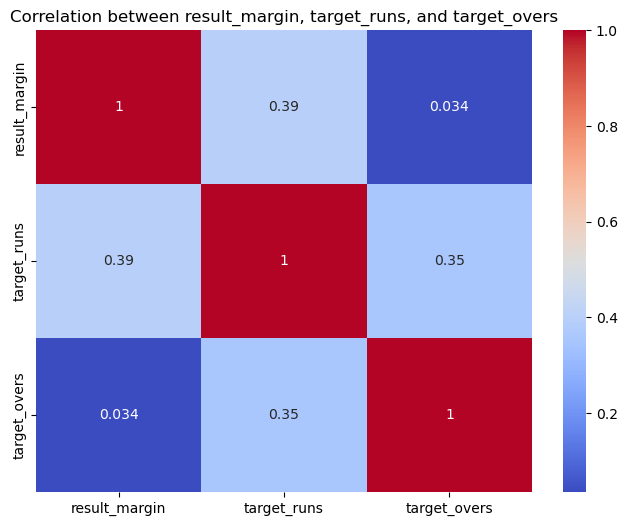

In [26]:
corr_cols = ['result_margin', 'target_runs', 'target_overs']
corr_matrix = ipl[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between result_margin, target_runs, and target_overs')
plt.show()

### <span style="color:#800000"> Insights </span>
 
- <span style="color:#808000">**Result Margin & Target Runs:**</span> Weak positive correlation (**0.39**), meaning higher targets slightly increase victory margins.
- <span style="color:#808000">**Result Margin & Target Overs:**</span> No significant correlation (**0.034**).
- <span style="color:#808000">**Target Runs & Target Overs:**</span> Weak positive correlation (**0.35**), suggesting more overs may lead to higher targets.

<span style="color:orange">**Conclusion:**</span> Target runs have some influence on result margin, while target overs show minimal direct impact.

### <span style="color:green">Matches Won by Each Team</span>  
We visualize the number of matches won by each team using a <span style="color:orange"> **bar plot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**value_counts().plot(kind='bar')**</span>: Plots a bar chart for match wins.  
- <span style="color:brown">**plt.title() / plt.xlabel() / plt.ylabel()**</span>: Adds title and axis labels.  
- <span style="color:brown">**plt.xticks(rotation=90)**</span>: Rotates x-axis labels for better readability.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


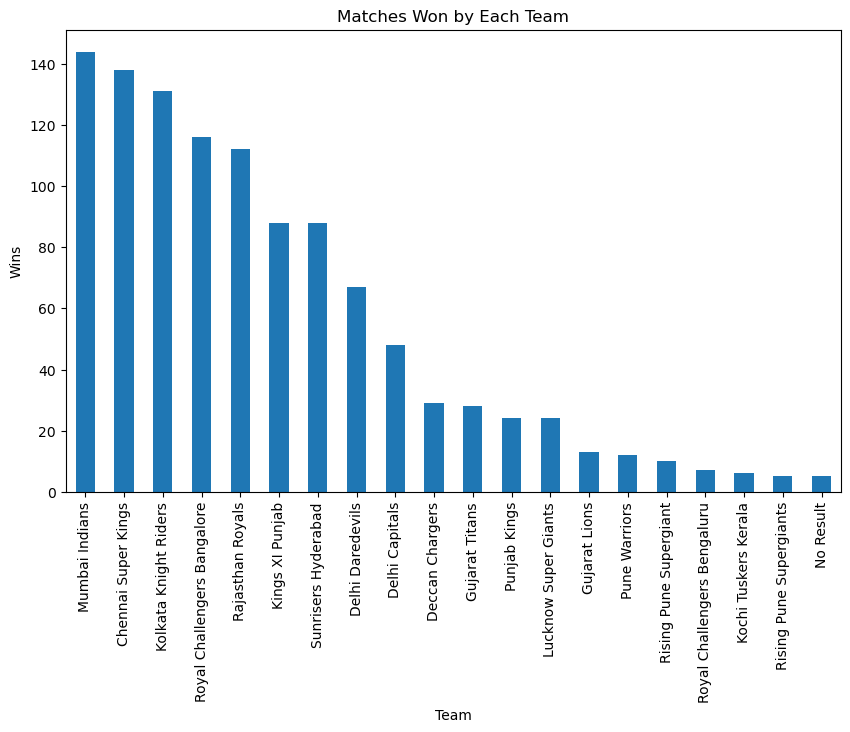

In [27]:
plt.figure(figsize=(10, 6))
ipl['winner'].value_counts().plot(kind='bar')
plt.title('Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Mumbai Indians:**</span> Most successful team with the highest number of wins.
- <span style="color:#808000">**Chennai Super Kings & Kolkata Knight Riders:**</span> Strong performers, closely following MI in total wins.
- <span style="color:#808000">**Royal Challengers Bangalore & Rajasthan Royals:**</span> Competitive teams with over 100 wins.
- <span style="color:#808000">**Newer teams like Gujarat Titans & Lucknow Super Giants:**</span> Have a smaller win count due to fewer seasons played.
- <span style="color:#808000">**Teams like Pune Warriors & Kochi Tuskers Kerala:**</span> Show minimal wins, possibly due to short-lived participation.

<span style="color:orange">**Conclusion:**</span> Established franchises like Mumbai Indians and CSK have dominated the IPL, while newer or discontinued teams show lower win counts.


### <span style="color:green">Number of Unique Venues</span>  
We visualize the number of unique venues where IPL matches have been played using a <span style="color:orange"> **bar plot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**ipl['venue'].value_counts().plot(kind='bar')**</span>: Plots a bar chart for venue frequency.  
- <span style="color:brown">**plt.title() / plt.xlabel() / plt.ylabel()**</span>: Adds title and axis labels.  
- <span style="color:brown">**plt.xticks(rotation=90)**</span>: Rotates x-axis labels for better readability.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


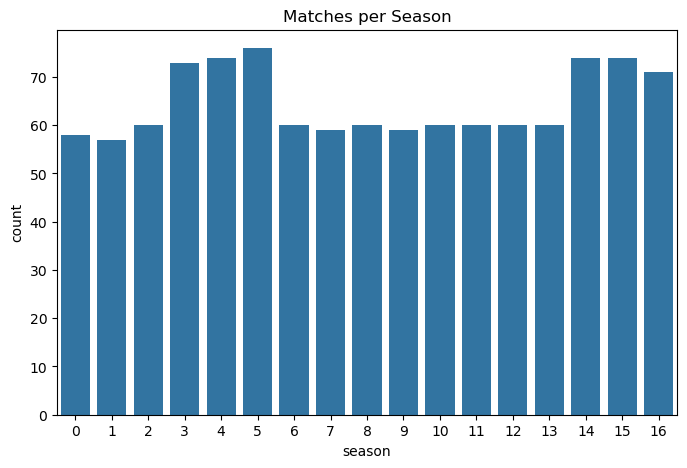

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ipl, x='season', order=sorted(ipl['season'].unique()))
plt.title('Matches per Season')
plt.xticks(rotation=0)
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Seasons 3 to 5:**</span> Highest number of matches played, indicating peak participation or extended formats during these years.
- <span style="color:#808000">**Seasons 6 to 13:**</span> Consistent number of matches around the 60-mark, showing a stabilized league structure.
- <span style="color:#808000">**Seasons 14 to 16:**</span> Slight increase in matches, likely due to league expansion or format changes.

<span style="color:orange">**Conclusion:**</span> The number of matches per season has fluctuated over time, with recent seasons witnessing a rise, reflecting the league's growth and evolving format.


### <span style="color:green">Team vs Team Matchups</span>  
We visualize how many times each pair of teams has faced each other using a <span style="color:orange"> **heatmap** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**pd.crosstab()**</span>: Creates a frequency table of matches between teams.  
- <span style="color:brown">**sns.heatmap()**</span>: Visualizes the matchup frequency using a heatmap.  
- <span style="color:brown">**plt.title()**</span>: Adds a title to the heatmap.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


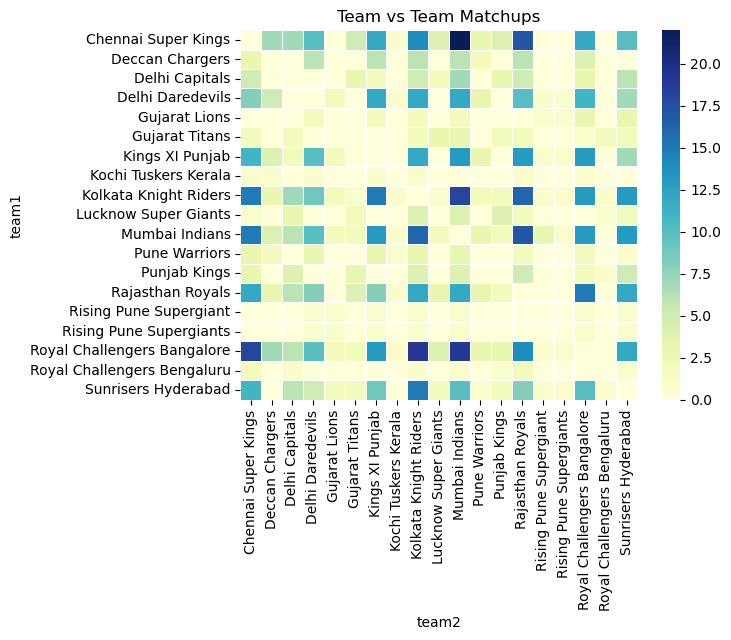

In [29]:
team_vs_team = pd.crosstab(ipl['team1'], ipl['team2'])
sns.heatmap(team_vs_team, cmap="YlGnBu", linewidths=.5)
plt.title('Team vs Team Matchups')
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Darker squares:**</span> Represent frequent matchups, indicating popular rivalries or commonly scheduled matches (e.g., Mumbai Indians vs CSK, RCB vs KKR).
- <span style="color:#808000">**Lighter squares or blanks:**</span> Indicate fewer or no matches, often seen for newer or discontinued teams like Gujarat Titans, Kochi Tuskers Kerala, and Rising Pune Supergiant.
- <span style="color:#808000">**Diagonal is not significant:**</span> Diagonal squares are team vs itself, hence not applicable.

<span style="color:orange">**Conclusion:**</span> The heatmap highlights historic rivalries and reveals teams with limited or no head-to-head matches due to short participation or recent entry.


### <span style="color:green">Pairplot for Result Margin, Target Runs, and Target Overs</span>  
We visualize pairwise relationships between key numerical columns using a <span style="color:orange"> **pairplot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**sns.pairplot()**</span>: Creates scatter plots and distributions to explore relationships between the selected columns.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


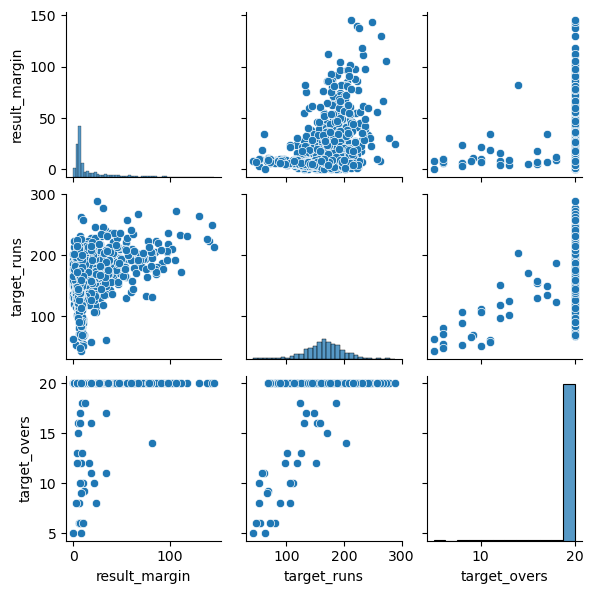

In [30]:
sns.pairplot(ipl[['result_margin', 'target_runs', 'target_overs']], height=2)  
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**result_margin vs target_runs:**</span> Positive linear trend, indicating higher targets often lead to bigger win margins.
- <span style="color:#808000">**target_runs vs target_overs:**</span> Slight upward trend showing longer innings tend to set higher targets.
- <span style="color:#808000">**result_margin vs target_overs:**</span> Sparse but increasing pattern, implying some big wins occur in longer innings.
- <span style="color:#808000">**Distributions:**</span> target_overs is highly skewed (many matches fixed at 20 overs), while result_margin is concentrated around small values.

<span style="color:orange">**Conclusion:**</span> Stronger targets and longer innings slightly contribute to greater win margins, but most matches end within the full 20 overs, as seen in the distributions.


### <span style="color:green">Target Runs Distribution Across Seasons</span>  
We visualize how target runs vary across different IPL seasons using a <span style="color:orange"> **boxplot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**sns.boxplot()**</span>: Creates a boxplot to show the distribution, median, and outliers of target runs season-wise.  
- <span style="color:brown">**plt.title()**</span>: Adds a descriptive title to the plot.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


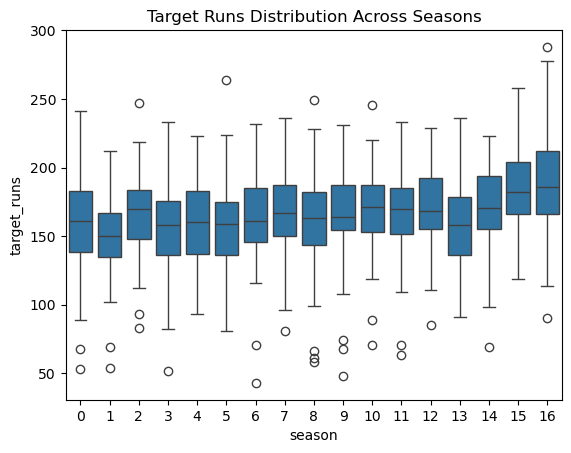

In [31]:
sns.boxplot(x='season', y='target_runs', data=ipl)
plt.title('Target Runs Distribution Across Seasons')
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Median Target Runs:**</span> Gradually increased over the seasons, especially visible in the last few seasons.
- <span style="color:#808000">**Spread of Target Runs:**</span> Remains wide across all seasons, indicating varying match situations and scores.
- <span style="color:#808000">**Recent Seasons (15 & 16):**</span> Show higher median and maximum target runs, suggesting more high-scoring games.
- <span style="color:#808000">**Outliers:**</span> Low target matches exist across seasons, likely due to collapses or rain-shortened games.

<span style="color:orange">**Conclusion:**</span> IPL matches have become more high-scoring in recent seasons, with greater target runs, reflecting aggressive batting trends and evolving pitch conditions.


### <span style="color:green">Top 10 Winning Teams</span>  
We visualize the teams with the most match wins using a <span style="color:orange"> **countplot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**sns.countplot()**</span>: Plots the count of match wins for the top 10 teams.  
- <span style="color:brown">**order=...**</span>: Ensures teams are ordered by their win count.  
- <span style="color:brown">**plt.title() / plt.xlabel() / plt.ylabel()**</span>: Adds a title and axis labels.  
- <span style="color:brown">**plt.tight_layout()**</span>: Adjusts spacing to avoid overlap.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


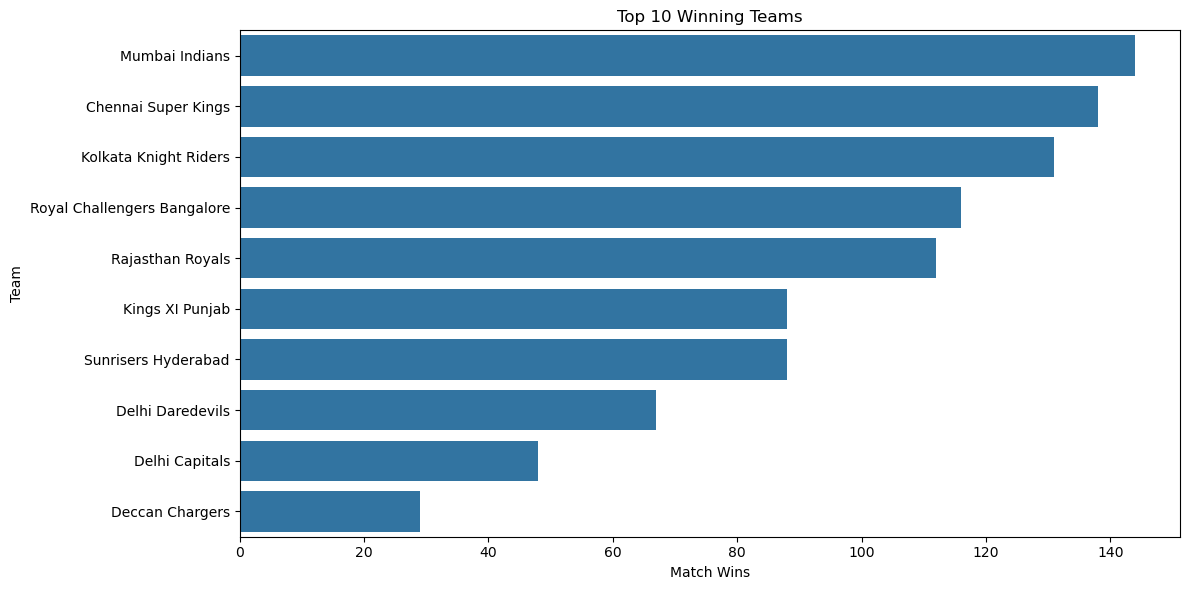

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(y='winner', data=ipl, order=ipl['winner'].value_counts().head(10).index)
plt.title('Top 10 Winning Teams')
plt.xlabel('Match Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Mumbai Indians & Chennai Super Kings:**</span> Most successful IPL teams with the highest match wins.
- <span style="color:#808000">**Kolkata Knight Riders & Royal Challengers Bangalore:**</span> Strong performers with over 100 wins.
- <span style="color:#808000">**Delhi Capitals, Sunrisers Hyderabad & Kings XI Punjab:**</span> Competitive mid-tier teams.
- <span style="color:#808000">**Deccan Chargers & Delhi Daredevils:**</span> Fewer wins due to shorter participation or rebranding.

<span style="color:orange">**Conclusion:**</span> Mumbai Indians and CSK have dominated IPL history in terms of match wins, while several other teams have consistently remained competitive.


### <span style="color:green">Top 10 Venues by Match Count</span>  
We visualize the venues that have hosted the most IPL matches using a <span style="color:orange"> **countplot** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**sns.countplot()**</span>: Plots the count of matches for the top 10 venues.  
- <span style="color:brown">**order=...**</span>: Sorts venues based on match count.  
- <span style="color:brown">**plt.title() / plt.xlabel() / plt.ylabel()**</span>: Adds a title and axis labels.  
- <span style="color:brown">**plt.tight_layout()**</span>: Adjusts layout for better readability.  
- <span style="color:brown">**plt.show()**</span>: Displays the plot.  


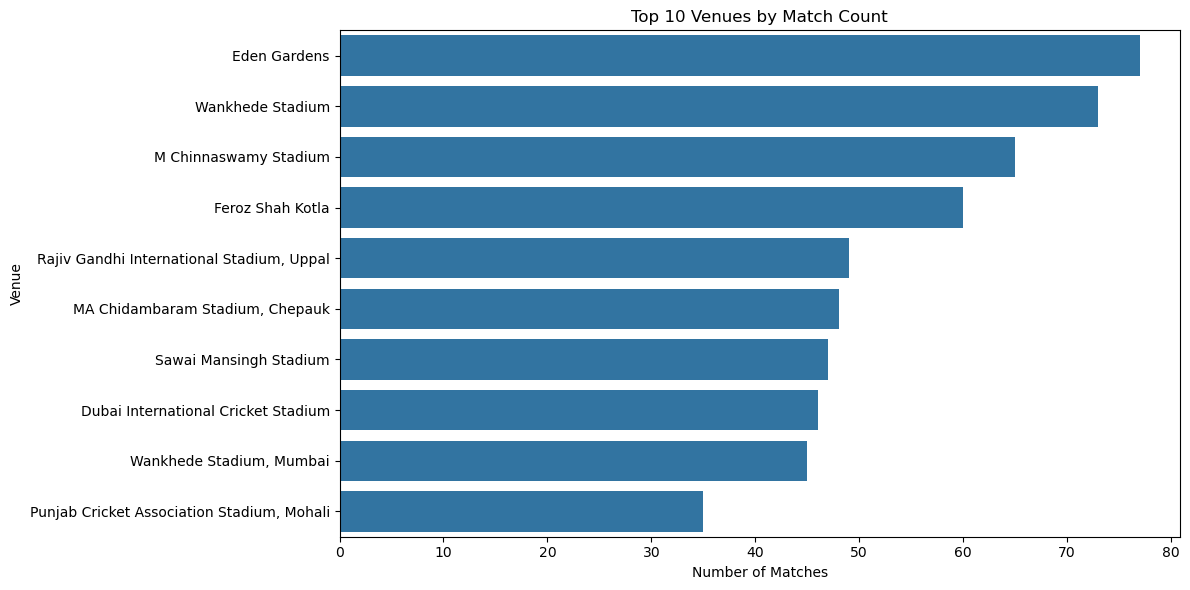

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='venue', data=ipl, order=ipl['venue'].value_counts().head(10).index)
plt.title('Top 10 Venues by Match Count')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Eden Gardens & Wankhede Stadium:**</span> Most popular IPL venues, hosting the highest number of matches.
- <span style="color:#808000">**M Chinnaswamy Stadium & Feroz Shah Kotla:**</span> Other frequently used, iconic venues.
- <span style="color:#808000">**Rajiv Gandhi International Stadium, Chepauk, and Sawai Mansingh Stadium:**</span> Major home grounds contributing significantly to match counts.
- <span style="color:#808000">**Dubai International Stadium:**</span> International venue featured prominently, likely due to IPL seasons hosted outside India.

<span style="color:orange">**Conclusion:**</span> Traditional home grounds like Eden Gardens and Wankhede Stadium dominate IPL hosting, with international venues gaining prominence in recent years.


### <span style="color:green">Toss Decision Distribution</span>  
We visualize the distribution of toss decisions using a <span style="color:orange"> **pie chart** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**value_counts()**</span>: Counts the frequency of each toss decision.  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**plt.pie()**</span>: Plots a pie chart showing the percentage of each toss decision.  
- <span style="color:brown">**colors=sns.color_palette("Set2")**</span>: Adds aesthetically pleasing colors to the chart.  
- <span style="color:brown">**plt.title() / plt.tight_layout() / plt.show()**</span>: Adds title, adjusts layout, and displays the plot.  


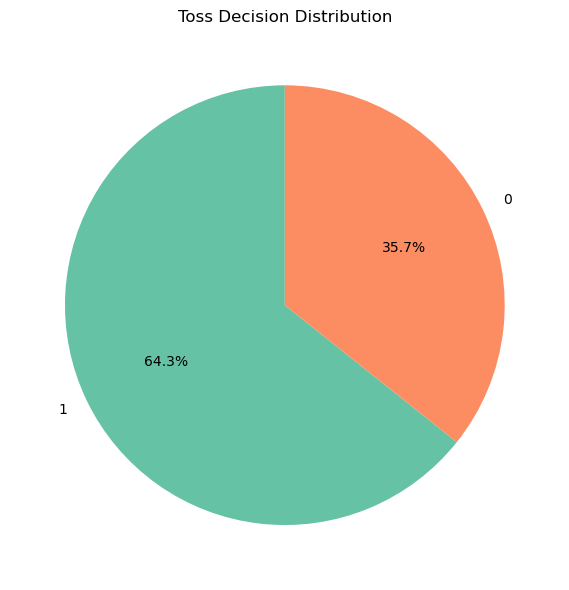

In [34]:
toss_counts = ipl['toss_decision'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(toss_counts, labels=toss_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Toss Decision Distribution')
plt.tight_layout()
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**1 (likely 'Field' or 'Bowl First'):**</span> Chosen in **64.3%** of matches, showing teams prefer to chase targets after winning the toss.
- <span style="color:#808000">**0 (likely 'Bat First'):**</span> Chosen in **35.7%** of matches, indicating a smaller preference for setting a target.

<span style="color:orange">**Conclusion:**</span> Most teams prefer to field first after winning the toss, reflecting a chasing-friendly strategy in the IPL.


### <span style="color:green">Toss Winner vs Match Winner</span>  
We visualize the relationship between toss winners and match winners using a <span style="color:orange"> **heatmap** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**pd.crosstab()**</span>: Creates a frequency table of toss winner vs match winner.  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**sns.heatmap()**</span>: Visualizes the frequency using a heatmap.  
- <span style="color:brown">**plt.title() / plt.xlabel() / plt.ylabel()**</span>: Adds title and axis labels.  
- <span style="color:brown">**plt.tight_layout() / plt.show()**</span>: Adjusts layout and displays the plot.  


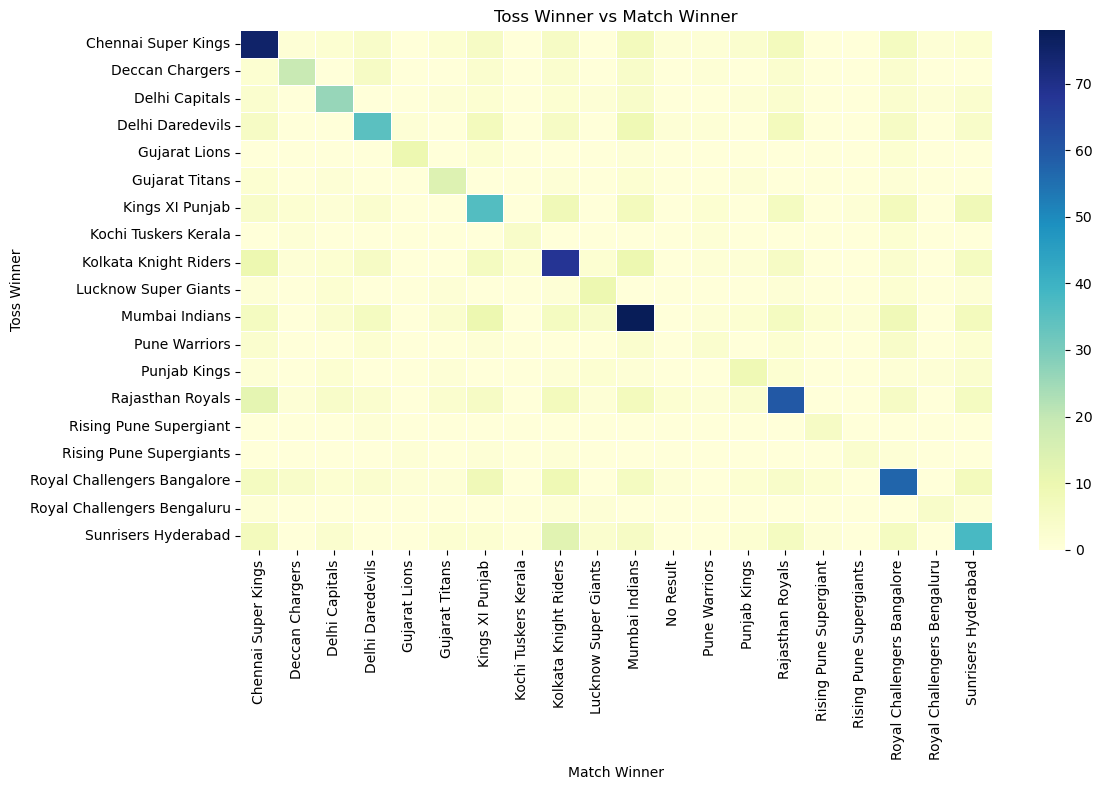

In [35]:
toss_vs_match = pd.crosstab(ipl['toss_winner'], ipl['winner'])
plt.figure(figsize=(12, 8))
sns.heatmap(toss_vs_match, cmap='YlGnBu', linewidths=0.5)
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.tight_layout()
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**Darker diagonal cells:**</span> Indicate teams frequently winning the match after winning the toss, especially visible for CSK, KKR, and MI.
- <span style="color:#808000">**Lighter off-diagonal cells:**</span> Show instances where toss winners differ from match winners, suggesting toss doesn't always guarantee victory.
- <span style="color:#808000">**Teams like CSK and MI:**</span> Consistently convert toss wins into match wins more often than others.

<span style="color:orange">**Conclusion:**</span> While winning the toss offers an advantage for certain teams, especially strong ones like CSK and MI, it does not guarantee victory for all teams.

### <span style="color:green">Correlation Heatmap of Numeric Features</span>  
We visualize the correlation between all numerical columns using a <span style="color:orange"> **heatmap** </span>.  

##### <span style="color:violet">Functions used</span>  
- <span style="color:brown">**select_dtypes(include='number')**</span>: Selects only numeric columns from the dataset.  
- <span style="color:brown">**numeric_df.corr()**</span>: Calculates the correlation matrix for numeric features.  
- <span style="color:brown">**plt.figure()**</span>: Sets the plot size.  
- <span style="color:brown">**sns.heatmap()**</span>: Visualizes the correlation matrix with color intensity and annotations.  
- <span style="color:brown">**plt.title() / plt.tight_layout() / plt.show()**</span>: Adds title, adjusts layout, and displays the plot.  


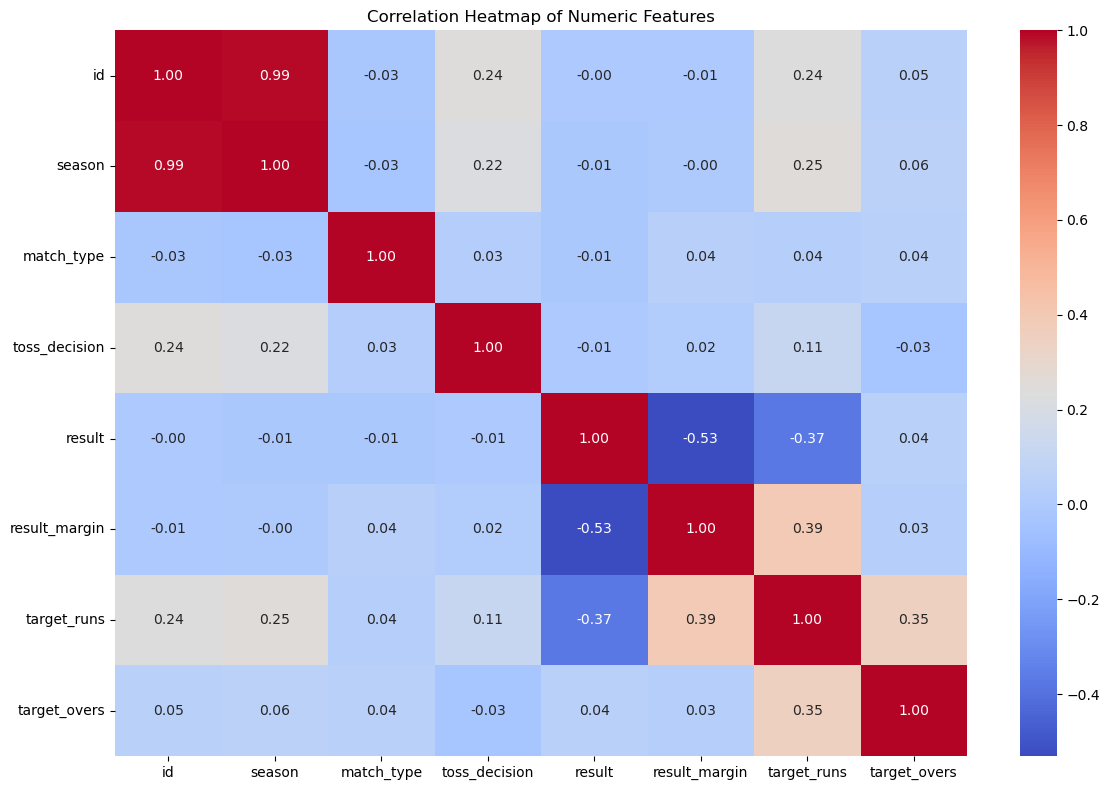

In [36]:
numeric_df = ipl.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### <span style="color:#800000"> Insights </span>

- <span style="color:#808000">**id and season:**</span> Strong correlation (0.99) showing matches are chronologically structured.
- <span style="color:#808000">**result_margin and result:**</span> Negative correlation (-0.53), indicating outcome is influenced by how close or one-sided the match was.
- <span style="color:#808000">**target_runs and result_margin:**</span> Positive correlation (0.39), suggesting higher targets often lead to larger victory margins.
- <span style="color:#808000">**target_runs and target_overs:**</span> Moderate correlation (0.35), showing longer innings tend to yield bigger targets.
- <span style="color:#808000">**match_type, toss_decision, result:**</span> Very weak correlations, indicating these may act more as categorical features.

<span style="color:orange">**Conclusion:**</span> Only a few numeric features show strong linear relationships. target_runs and result_margin may carry predictive value, while others might need separate encoding or treatment.
